In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
import numpy as np

In [2]:
c = [
    'itg_mean',
    'itg_stdev',
    'itg_kurtosis',
    'itg_skewness',
    'dm_snr_mean',
    'dm_snr_stdev',
    'dm_snr_kurtosis',
    'dm_snr_skew',
    'candidate_pulsar'
]

In [3]:
df = pd.read_csv('HTRU2/HTRU_2.csv', header = None, names = c)

In [5]:
X = df[df.columns[:-1]]
y = df.candidate_pulsar

df_train, df_test = train_test_split(df,
                                   test_size = 0.2,
                                   random_state = 25,
                                    stratify = y)

In [6]:
from imblearn.over_sampling import RandomOverSampler

train_X = df_train[df_train.columns[:-1]]
train_y = df_train.candidate_pulsar

ros = RandomOverSampler(random_state = 25)
X_ovs, y_ovs = ros.fit_sample(train_X, train_y)

In [7]:
df_train_ovs = X_ovs
df_train_ovs['candidate_pulsar'] = y_ovs

In [8]:
with open('pickles/df_train.pickle', 'wb') as to_write:
    pickle.dump(df_train, to_write)
    
with open('pickles/df_test.pickle', 'wb') as to_write:
    pickle.dump(df_test, to_write)
    
with open('pickles/df_train_ovs.pickle', 'wb') as to_write:
    pickle.dump(df_train_ovs, to_write)   

In [9]:
df_train.shape, df_test.shape

((14318, 9), (3580, 9))

Text(0.5, 1.0, '9:1 Class Imbalance')

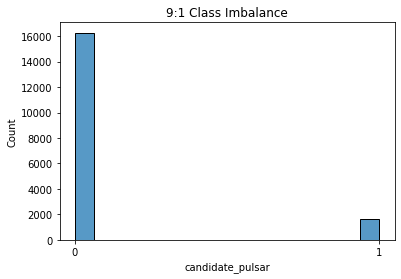

In [15]:
sns.histplot(data = df, x = 'candidate_pulsar');
plt.xticks([0, 1]);
plt.title('9:1 Class Imbalance')

In [10]:
df.candidate_pulsar.value_counts()
1639/(1639+16259)

0.09157447759526204

In [11]:
df_train.loc[:, 'candidate_pulsar'] = df_train.loc[:, 'candidate_pulsar'].astype('category')
df_train.loc[:, 'candidate_pulsar'] = df_train.loc[:, 'candidate_pulsar'].cat.as_ordered()

/Users/emma-clairemccarthy/opt/anaconda3/envs/ids/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [12]:
df_train.head()

itg_mean  itg_stdev  itg_kurtosis  itg_skewness  dm_snr_mean  \
16043  155.203125  45.847294     -0.230128     -0.024023     4.428930   
14865  147.414062  44.643471     -0.402495      0.199012     1.869565   
8702   109.484375  46.794595      0.184173      0.341620     2.773411   
4203   108.015625  53.067614      0.194183     -0.080393     4.356187   
16607  123.031250  44.164631     -0.146612      0.281257     1.724080   

       dm_snr_stdev  dm_snr_kurtosis  dm_snr_skew candidate_pulsar  
16043     25.421480         6.583754    45.789819                0  
14865     14.007095        12.165425   181.951097                0  
8702      19.305492         8.674881    82.548541                0  
4203      25.767001         6.770802    48.907870                0  
16607     11.386526        13.099121   236.426202                0

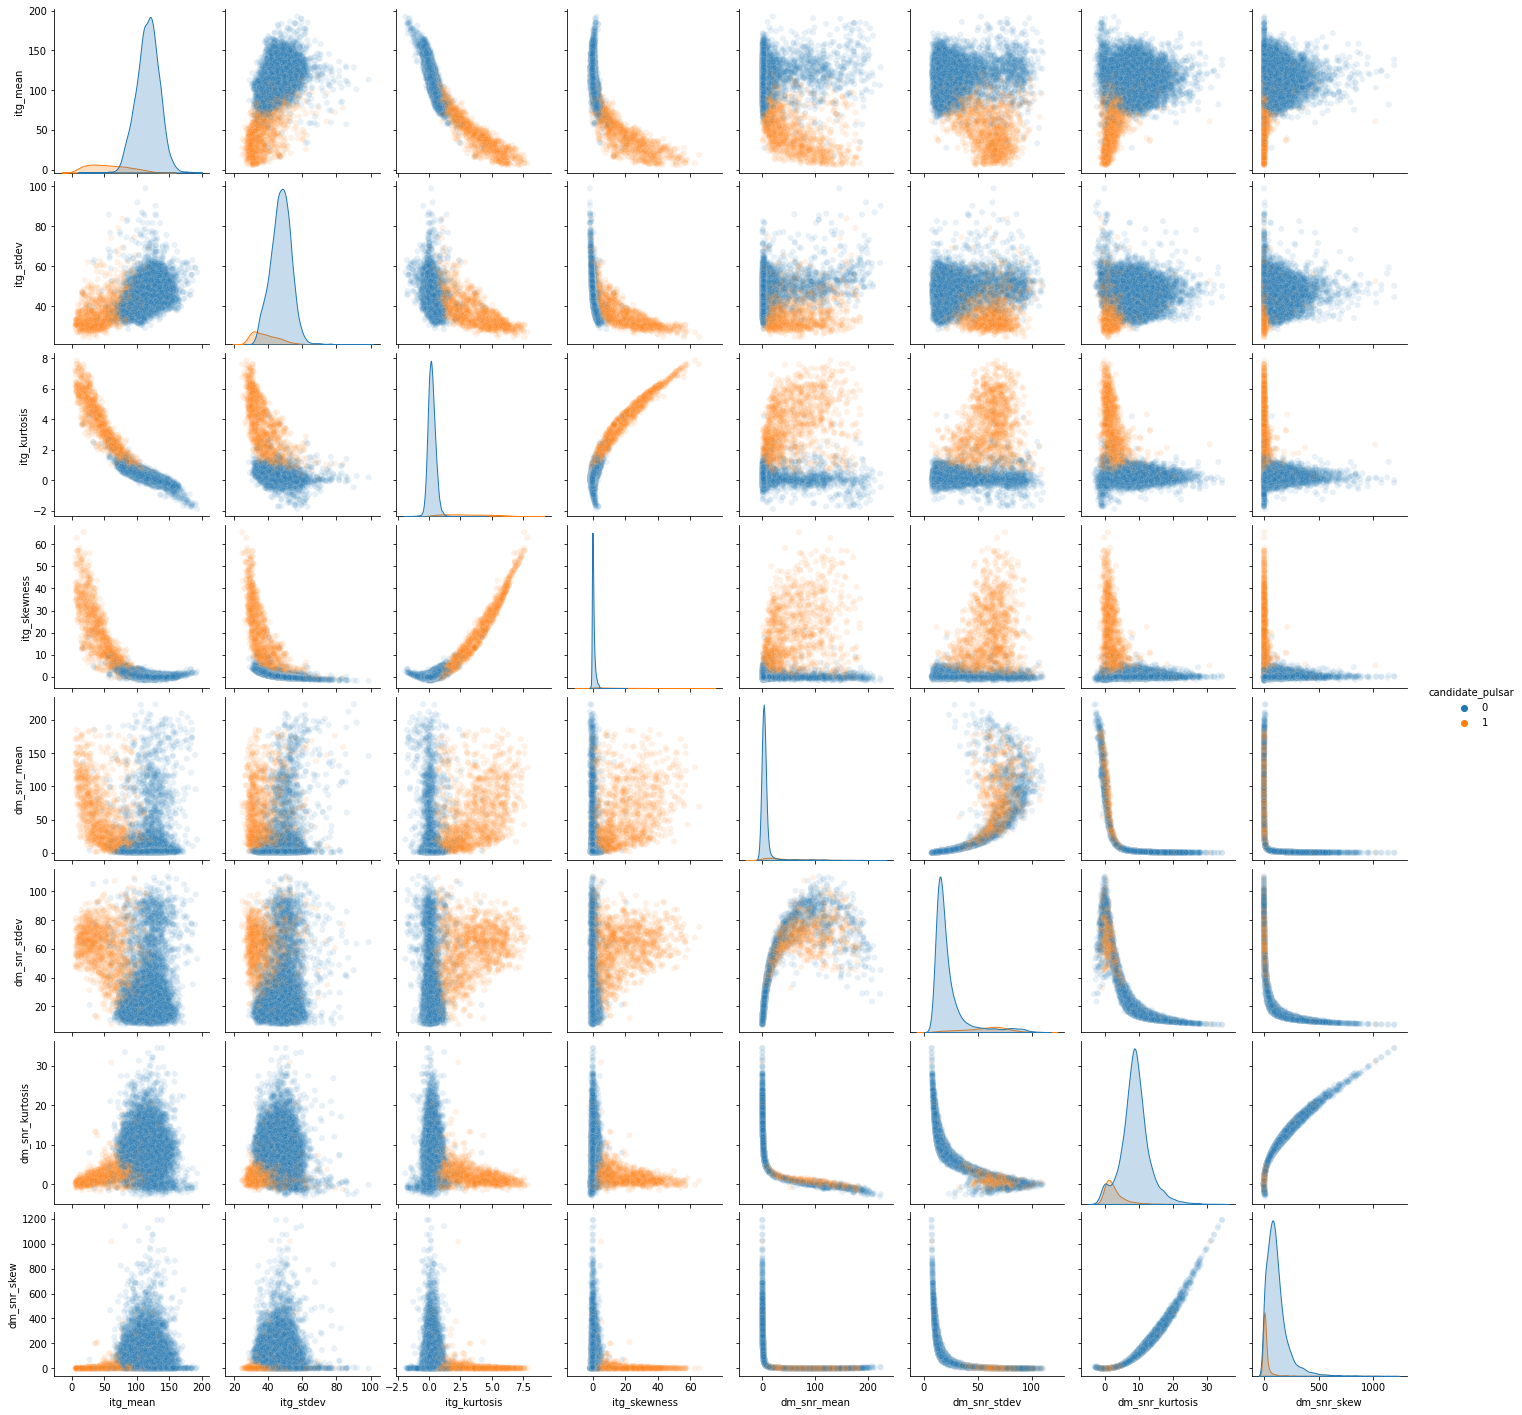

In [16]:
#for i in df_train.columns[:-1]:    
sns.pairplot(df_train, plot_kws={'alpha':0.1}, hue = 'candidate_pulsar');

<AxesSubplot:xlabel='itg_kurtosis', ylabel='candidate_pulsar'>

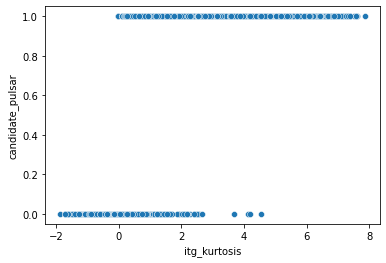

In [10]:
sns.scatterplot(data = df_train, x = 'itg_kurtosis', y = 'candidate_pulsar')

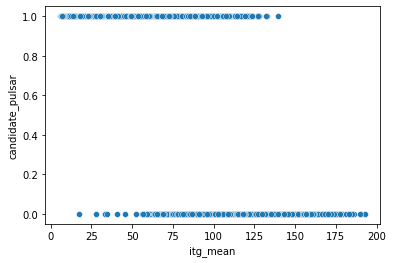

In [11]:
sns.scatterplot(data = df_train, x = 'itg_mean', y = 'candidate_pulsar');

<AxesSubplot:xlabel='itg_mean', ylabel='itg_kurtosis'>

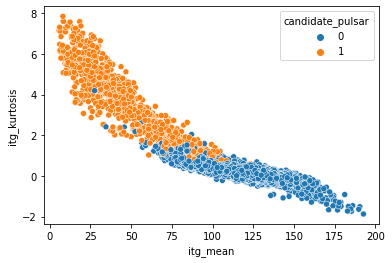

In [12]:
sns.scatterplot(data = df_train, x = 'itg_mean', y = 'itg_kurtosis', hue = 'candidate_pulsar')


In [26]:
df_sub = df_train[['itg_mean', 'itg_kurtosis', 'candidate_pulsar']]

In [27]:
df_sub['mean_mean'] = df_train.itg_mean * df_train.itg_mean
df_sub['kurtosis_mean'] = df_train.itg_kurtosis * df_train.itg_mean
df_sub['kurtosis_kurtosis'] = df_train.itg_kurtosis * df_train.itg_kurtosis
df_sub['kurtosis_div_mean'] = df_train.itg_kurtosis / df_train.itg_mean
df_sub['mean_div_kurtosis'] = df_train.itg_mean / df_train.itg_kurtosis

<ipython-input-27-07635320393b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['mean_mean'] = df_train.itg_mean * df_train.itg_mean
<ipython-input-27-07635320393b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['kurtosis_mean'] = df_train.itg_kurtosis * df_train.itg_mean
<ipython-input-27-07635320393b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [28]:
df_sub

itg_mean  itg_kurtosis  candidate_pulsar     mean_mean  \
16043  155.203125     -0.230128                 0  24088.010010   
14865  147.414062     -0.402495                 0  21730.905823   
8702   109.484375      0.184173                 0  11986.828369   
4203   108.015625      0.194183                 0  11667.375244   
16607  123.031250     -0.146612                 0  15136.688477   
...           ...           ...               ...           ...   
6139    86.765625      0.424054                 0   7528.273682   
7559   129.859375      0.037367                 0  16863.457275   
13148   27.601562      4.198134                 0    761.846252   
15745  117.984375      0.271978                 0  13920.312744   
4345   135.367188     -0.145458                 0  18324.275452   

       kurtosis_mean  kurtosis_kurtosis  kurtosis_div_mean  mean_div_kurtosis  
16043     -35.716637           0.052959          -0.001483        -674.419878  
14865     -59.333481           0.162003          -0.002730        -366.250311  
8702       20.164066           0.033920           0.001682         594.464835  
4203       20.974808           0.037707           0.001798         556.256589  
16607     -18.037829           0.021495          -0.001192        -839.163544  
...              ...                ...                ...                ...  
6139       36.793302           0.179822           0.004887         204.609895  
7559        4.852479           0.001396           0.000288        3475.225080  
13148     115.875059          17.624329           0.152098           6.574722  
15745      32.089148           0.073972           0.002305         433.801258  
4345      -19.690197           0.021158          -0.001075        -930.629359  

[14318 rows x 8 columns]

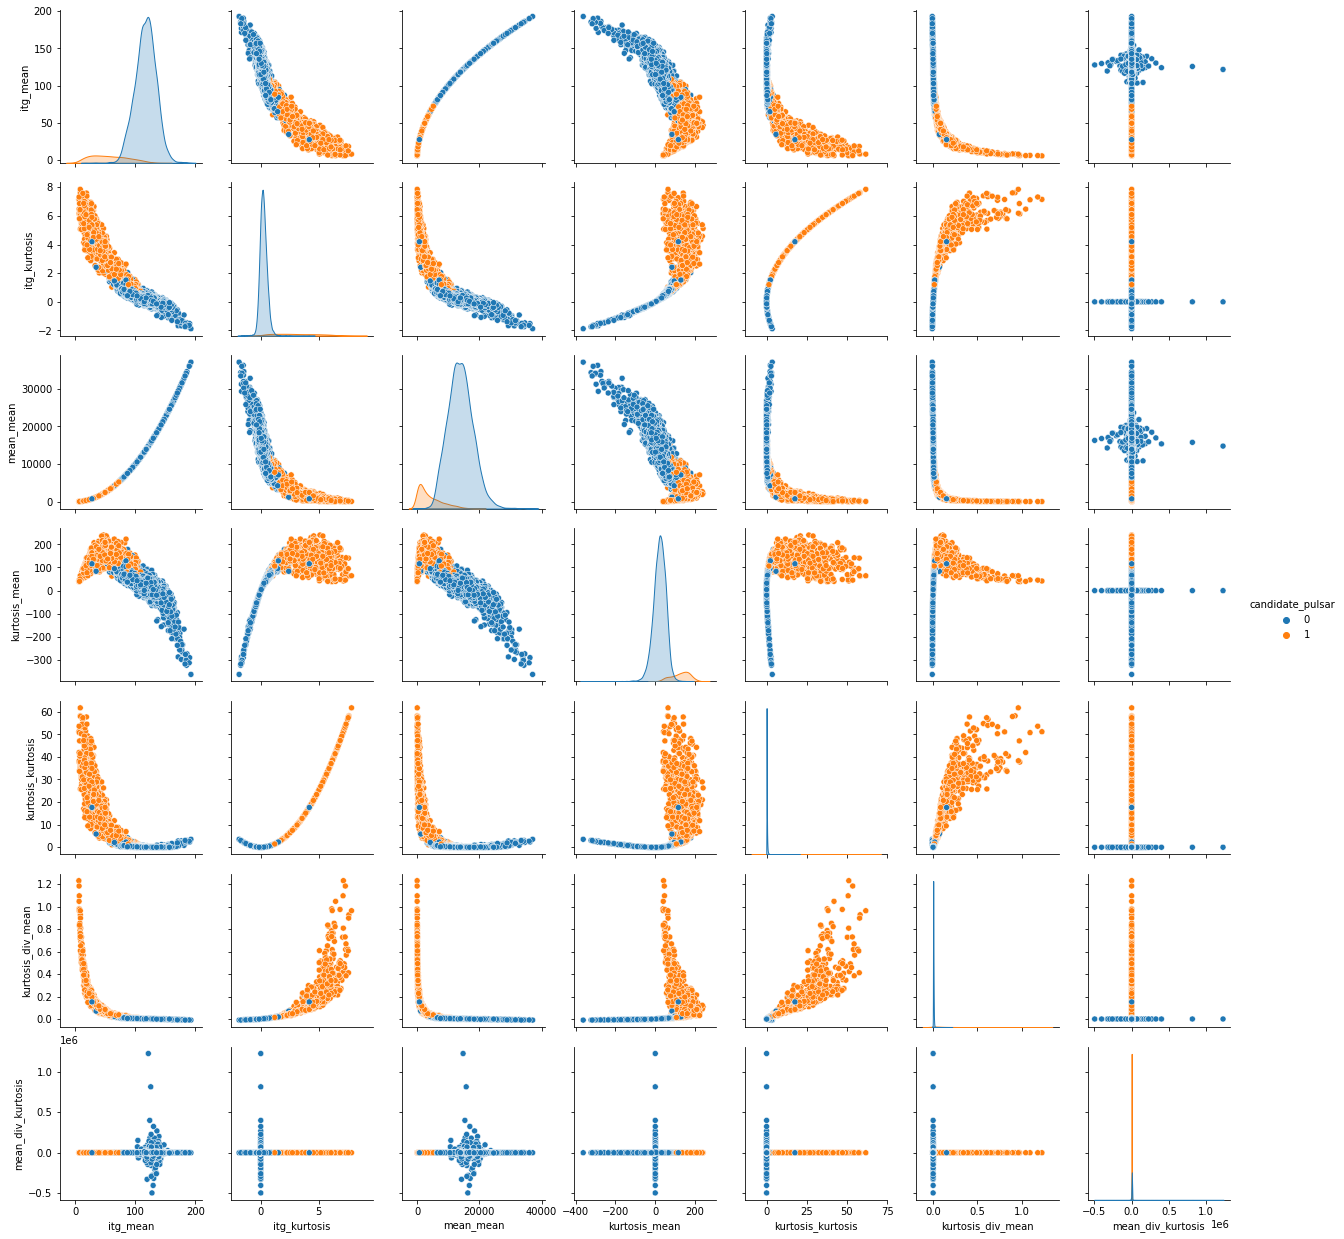

In [29]:
sns.pairplot(df_sub, hue = 'candidate_pulsar')